<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

# Importing libs:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import  inspect, rasterize
# colour maps lib
import colorcet as cc
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
# panel lib for widgets and dashboards
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
411383   2019-11-03 07:15:51.000 +0300         24.588915          46.596447   
2065200  2019-11-03 15:00:50.033 +0300         24.736721          46.659966   
2391239  2019-11-04 21:47:34.042 +0300         24.940998          46.711708   
688073   2019-11-02 13:52:34.920 +0300         24.793428          46.681460   
2594116  2019-11-04 19:32:05.636 +0300         24.839700          46.742897   
828520   2019-11-02 16:52:33.016 +0300         24.632540          46.720547   
1617883  2019-11-02 23:50:50.026 +0300         24.716503          46.765160   
2430111  2019-11-04 21:28:06.000 +0300         24.731571          46.777030   
709098   2019-11-03 14:13:01.018 +0300         24.808220          46.665604   
1157634  2019-11-02 21:15:54.999 +0300         24.792340          46.724964   
1555444  2019-11-04 10:08:39.001 +0300         24.667536          46.694874   
168988   2019-11-02 09:12:01.000 +0300         24.680735          46.736584   
1483656  2019-11-03 14:11:38.026 +0300         24.646390          46.841225   
741165   2019-11-02 21:04:53.030 +0300         24.749508          46.621420   
261464   2019-11-02 09:10:32.029 +0300         24.666613          46.726616   
1846093  2019-11-03 15:33:27.882 +0300         24.587578          46.762970   
1205150  2019-11-03 11:53:24.175 +0300         24.624002          46.746320   
415382   2019-11-03 16:37:53.885 +0300         24.744055          46.621570   
525279   2019-11-02 23:24:10.000 +0300         24.695736          46.680380   
1332309  2019-11-03 18:18:18.000 +0300         24.695970          46.658405   

        RadioConnectionType       Country RadioNetworkGeneration  \
411383               Mobile  Saudi Arabia                     4G   
2065200              Mobile  Saudi Arabia                     4G   
2391239              Mobile  Saudi Arabia                     4G   
688073               Mobile  Saudi Arabia                     4G   
2594116              Mobile  Saudi Arabia                     3G   
828520               Mobile  Saudi Arabia                     4G   
1617883              Mobile  Saudi Arabia                     4G   
2430111              Mobile  Saudi Arabia                     4G   
709098               Mobile  Saudi Arabia                     4G   
1157634              Mobile  Saudi Arabia                     4G   
1555444              Mobile  Saudi Arabia                     4G   
168988               Mobile  Saudi Arabia                     4G   
1483656              Mobile  Saudi Arabia                     3G   
741165               Mobile  Saudi Arabia                     4G   
261464               Mobile  Saudi Arabia                     4G   
1846093              Mobile  Saudi Arabia                     4G   
1205150              Mobile  Saudi Arabia                     4G   
415382               Mobile  Saudi Arabia                     4G   
525279               Mobile  Saudi Arabia                     3G   
1332309              Mobile  Saudi Arabia                     4G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
411383         Operator A         -84                Enabled   
2065200        Operator A         -81                Enabled   
2391239        Operator B         -67                Enabled   
688073         Operator A        -116                Enabled   
2594116        Operator B  2147483647                Enabled   
828520         Operator B         -95                Enabled   
1617883        Operator B         -57                Enabled   
2430111        Operator A         -87                Enabled   
709098         Operator A         -78                Enabled   
1157634        Operator A         -75                Enabled   
1555444        Operator A         -80                Enabled   
168988         Operator A         -90                Enabled   
1483656        Operator C  2147483647                Enabled   
741165         Operator A        -104       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


There is categorical data but it's treated as it is a string, I'll convert it into the category data type

In [6]:
cols = [
       "RadioConnectionType",
       "RadioNetworkGeneration",
       "RadioOperatorName",
       "RadioMobileDataEnabled",
       "DeviceManufacturer",
       "DeviceName"
      ]
RSRP_data[cols] = RSRP_data[cols].astype('category')

In [7]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Timestamp               object  
 1   LocationLatitude        float64 
 2   LocationLongitude       float64 
 3   RadioConnectionType     category
 4   Country                 object  
 5   RadioNetworkGeneration  category
 6   RadioOperatorName       category
 7   RSRP                    int64   
 8   RadioMobileDataEnabled  category
 9   DeviceManufacturer      category
 10  DeviceName              category
dtypes: category(6), float64(2), int64(1), object(2)
memory usage: 122.2+ MB


In [8]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [9]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [10]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [11]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [12]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [13]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [14]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [15]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

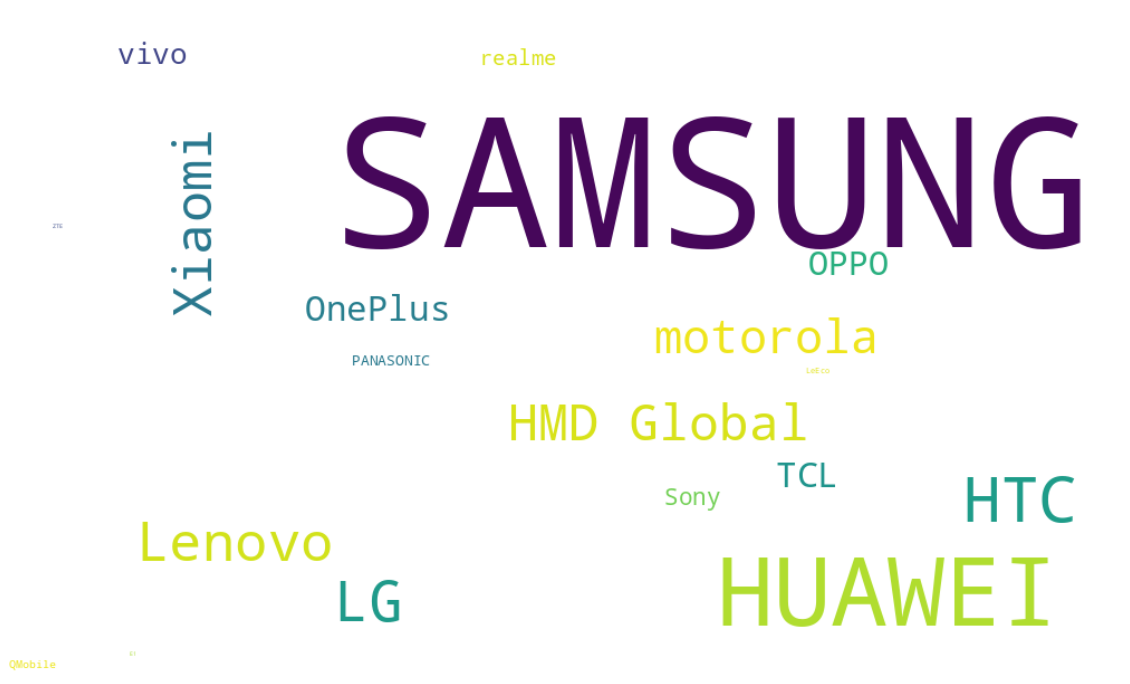

In [16]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

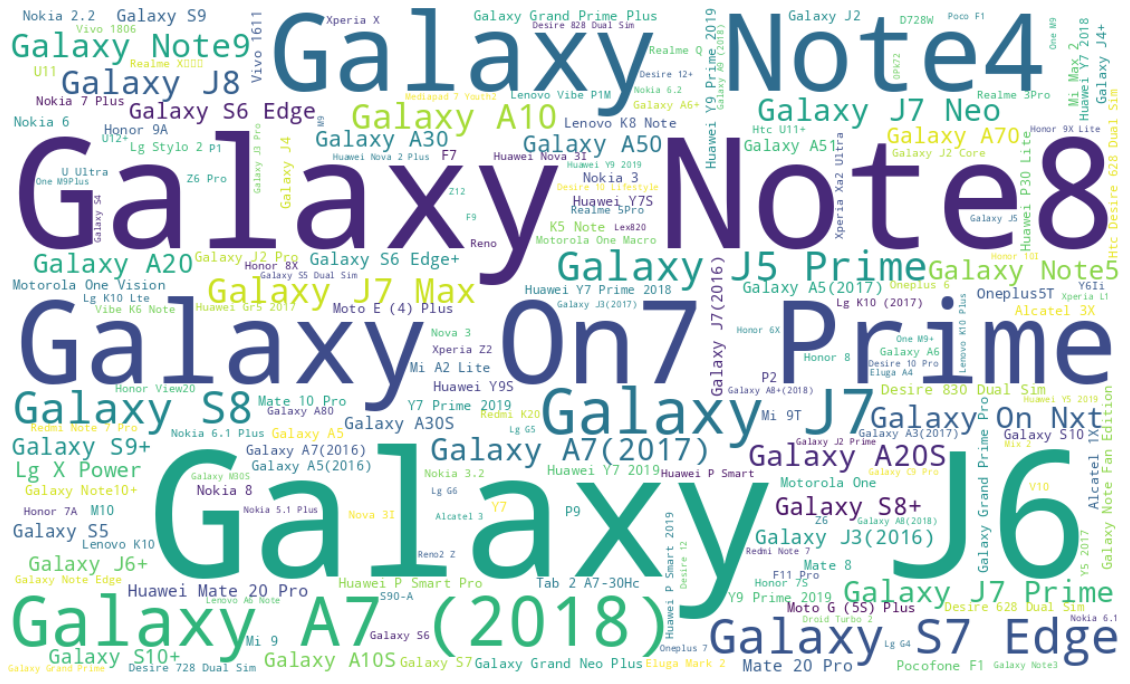

In [17]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [18]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [19]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     category           
 4   RadioNetworkGeneration  category           
 5   RadioOperatorName       category           
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  category           
 8   DeviceManufacturer      category           
 9   DeviceName              category           
dtypes: category(6), datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 101.4 MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [20]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [21]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [22]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
print(RSRP_data_invalid.shape)
RSRP_data_invalid.sample(20)

(644163, 10)


Timestamp  LocationLatitude  LocationLongitude  \
2454387 2019-11-04 10:13:28.017000+00:00         24.582323          46.769215   
1648391 2019-11-03 04:01:13.001000+00:00         24.893700          46.610325   
2493034 2019-11-04 05:20:20.015000+00:00         24.698677          46.668316   
1909886 2019-11-04 02:49:52.020000+00:00         24.689468          46.804540   
1824194 2019-11-02 15:47:32.547000+00:00         24.905090          46.391350   
1308581        2019-11-03 15:31:34+00:00         24.834960          46.758640   
2447123 2019-11-03 21:45:00.775000+00:00         24.764944          46.656280   
1558602 2019-11-04 02:11:07.055000+00:00         24.686949          46.635670   
2541440 2019-11-04 15:21:32.072000+00:00         24.904837          46.391243   
1693943        2019-11-03 20:02:27+00:00         24.853455          46.601753   
523444  2019-11-02 21:01:58.999000+00:00         24.803696          46.653960   
1904074 2019-11-04 13:19:11.071000+00:00         24.760876          46.791940   
1277939 2019-11-03 12:20:44.002000+00:00         24.713926          46.793877   
1538211 2019-11-04 09:04:17.176000+00:00         24.705927          46.659880   
1325922 2019-11-03 08:16:59.999000+00:00         24.687067          46.704018   
2566658 2019-11-04 09:37:57.024000+00:00         24.571917          46.700172   
1777420 2019-11-04 16:27:22.001000+00:00         24.708248          46.751545   
97710   2019-11-02 06:23:02.020000+00:00         24.747662          46.744835   
1776278 2019-11-03 08:46:17.025000+00:00         24.585870          46.807540   
2163960 2019-11-03 06:44:38.586000+00:00         24.910050          46.442974   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
2454387              Mobile                     4G        Operator C   
1648391              Mobile                     4G        Operator B   
2493034              Mobile                     3G        Operator A   
1909886              Mobile                     4G        Operator A   
1824194              Mobile                     3G        Operator A   
1308581              Mobile                     3G        Operator C   
2447123              Mobile                     4G        Operator C   
1558602              Mobile                     3G        Operator A   
2541440              Mobile                     3G        Operator A   
1693943              Mobile                     3G        Operator A   
523444               Mobile                     3G        Operator A   
1904074              Mobile                     4G        Operator C   
1277939              Mobile                     3G        Operator A   
1538211              Mobile                     4G        Operator C   
1325922              Mobile                     3G        Operator C   
2566658              Mobile                     4G        Operator C   
1777420              Mobile                     4G        Operator C   
97710                Mobile                     3G        Operator A   
1776278              Mobile                Unknown        Operator B   
2163960              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
2454387  2147483647                Enabled            SAMSUNG   
1648391  2147483647                Enabled            SAMSUNG   
2493034  2147483647                Enabled            SAMSUNG   
1909886  2147483647                Enabled            SAMSUNG   
1824194  2147483647                Enabled            SAMSUNG   
1308581  2147483647                Enabled            SAMSUNG   
2447123  2147483647                Enabled            SAMSUNG   
1558602  2147483647                Enabled            SAMSUNG   
2541440  2147483647                Enabled            SAMSUNG   
1693943  2147483647                Enabled            SAMSUNG   
523444   2147483647                Enabled            SAMSUNG   
1904074  2147483647                E

In [23]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
print(RSRP_data.shape)
RSRP_data_valid.sample(20)

(2725353, 10)


Timestamp  LocationLatitude  LocationLongitude  \
569900  2019-11-03 03:29:20.028000+00:00         24.826874          46.782692   
2722910 2019-11-04 14:20:13.849000+00:00         24.563944          46.877056   
1092667        2019-11-03 15:50:54+00:00         24.585300          46.745277   
1144154 2019-11-03 10:31:02.075000+00:00         24.551168          46.698486   
244348  2019-11-02 15:56:20.026000+00:00         24.599699          46.724926   
1131662        2019-11-02 16:11:54+00:00         24.575905          46.574196   
632344  2019-11-02 18:20:28.001000+00:00         24.752382          46.770710   
2575388 2019-11-04 16:35:48.039000+00:00         24.591698          46.716910   
1929030 2019-11-04 12:00:39.019000+00:00         24.717123          46.669090   
1705337        2019-11-03 22:45:26+00:00         24.832422          46.759440   
90585   2019-11-02 13:55:06.008000+00:00         24.862270          46.732533   
188163         2019-11-02 04:38:25+00:00         24.683690          46.767180   
2569433 2019-11-04 18:46:44.073000+00:00         24.774567          46.607124   
2561685 2019-11-04 14:22:49.787000+00:00         24.699333          46.855347   
2118089 2019-11-03 11:01:06.202000+00:00         24.731356          46.762310   
985444  2019-11-03 14:53:56.122000+00:00         24.700142          46.771206   
517370  2019-11-02 19:44:51.049000+00:00         24.587685          46.711227   
2324925        2019-11-04 10:40:24+00:00         24.768790          46.795513   
630173         2019-11-02 13:47:14+00:00         24.688665          46.755880   
1196127 2019-11-02 15:45:41.042000+00:00         24.720224          46.850070   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
569900               Mobile                     4G        Operator B   -82   
2722910              Mobile                     4G        Operator A   -73   
1092667              Mobile                     4G        Operator B   -85   
1144154              Mobile                     4G        Operator B   -96   
244348               Mobile                     4G        Operator A   -98   
1131662              Mobile                     4G        Operator A   -82   
632344               Mobile                     4G        Operator C   -79   
2575388              Mobile                     4G        Operator A   -89   
1929030              Mobile                     4G        Operator B   -93   
1705337              Mobile                     4G        Operator C   -72   
90585                Mobile                     4G        Operator A   -96   
188163               Mobile                     4G        Operator A   -93   
2569433              Mobile                     4G        Operator A   -66   
2561685              Mobile                     4G        Operator A   -99   
2118089              Mobile                     4G        Operator A   -74   
985444               Mobile                     4G        Operator A  -107   
517370               Mobile                     4G        Operator A   -78   
2324925              Mobile                     4G        Operator C   -66   
630173               Mobile                     4G        Operator C   -69   
1196127              Mobile                     4G        Operator A   -92   

        RadioMobileDataEnabled DeviceManufacturer        DeviceName  
569900                 Enabled            SAMSUNG  Galaxy A7 (2018)  
2722910                Enabled            SAMSUNG    Galaxy Note10+  
1092667                Enabled            SAMSUNG        Galaxy A30  
1144154                Enabled            SAMSUNG         Galaxy S8  
244348                 Enabled            SAMSUNG  Galaxy On7 Prime  
1131662                Enabled            SAMSUNG   Galaxy J5 Prime  
632344                 Enabled            SAMSUNG         Galaxy J8  
2575388                Enabled            SAMSUNG  Galaxy On7 Prime  
1929030                Enabled            SAMSUNG   Galaxy A

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

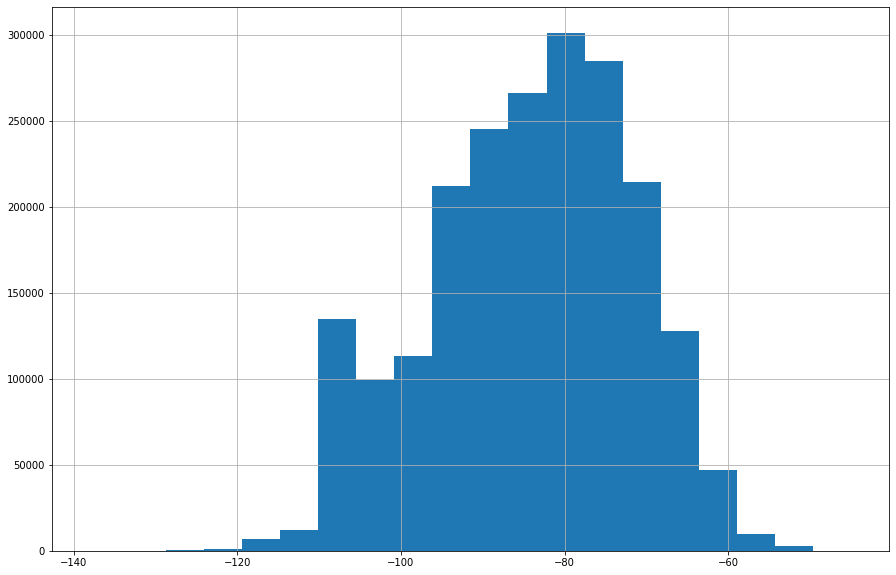

In [24]:
RSRP_data_valid["RSRP"].hist(figsize=(15,10), bins=20)
plt.show()

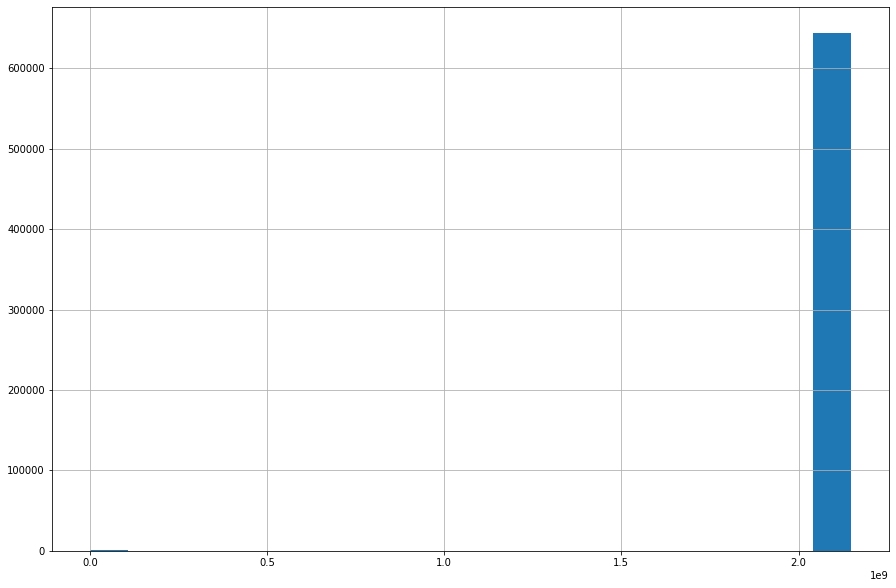

In [25]:
RSRP_data_invalid["RSRP"].hist(figsize=(15,10), bins=20)
plt.show()

Lookin at the histogram of these valid RSRP values, we see they are taking a bell curved shape. However, the invalid RSRP values are all almost the same invalid value, except for a few small values that are close to zero.
Looking for domain experience and by looking some the android documentation, I found out that this value (2147483647) is sent by the mobile phone when it can't read the RSRP value.

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

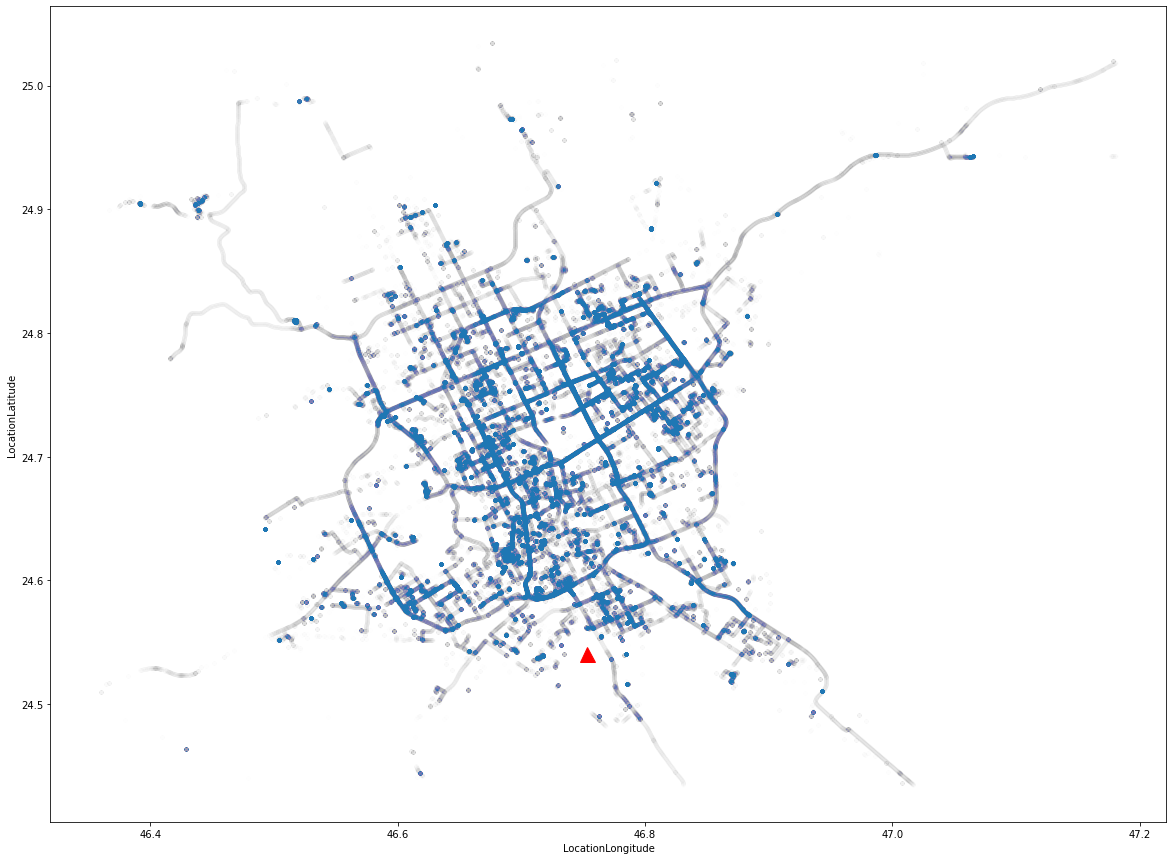

In [26]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

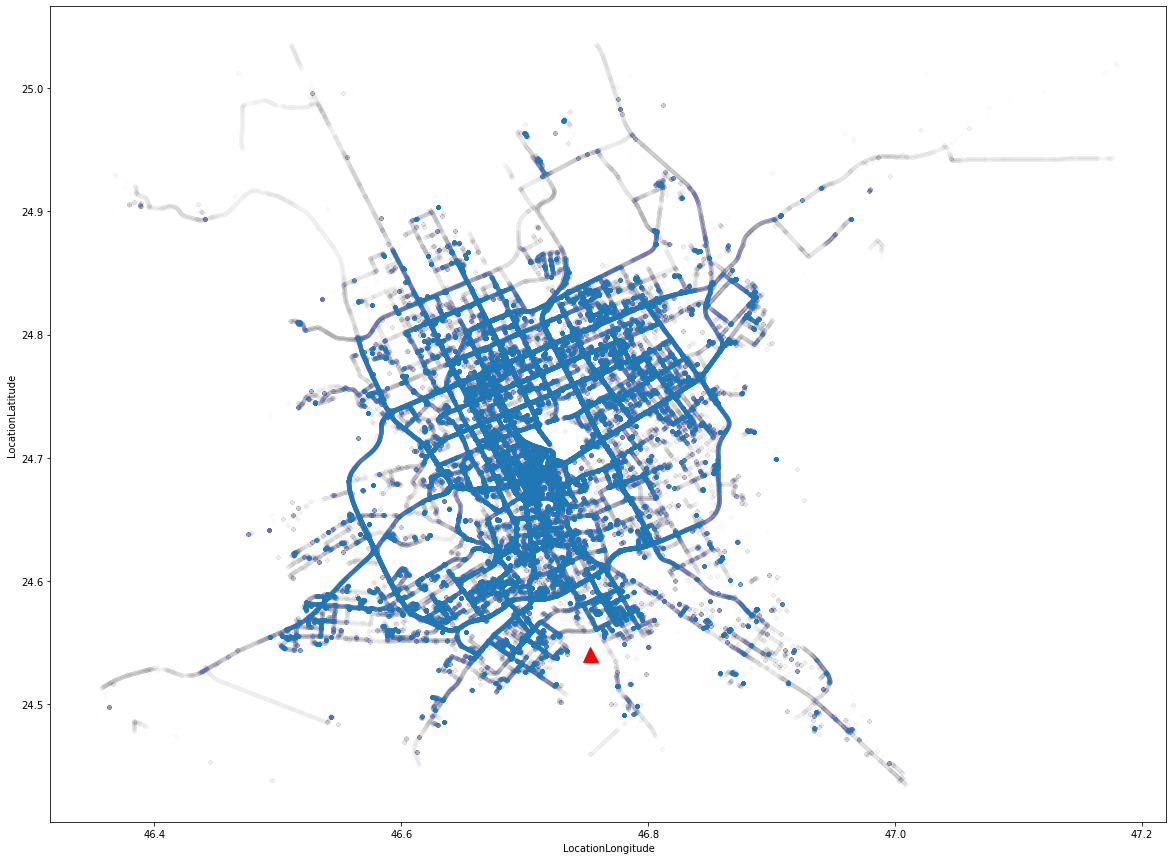

In [27]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [28]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
LAVA               6
ZTE                6
SHARP              5
LeEco              0
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [29]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
299788  2019-11-02 11:27:45.029000+00:00         24.827848          46.591816   
2716148 2019-11-03 13:59:34.031000+00:00         24.664839          46.732090   
141874  2019-11-02 11:28:07.045000+00:00         24.830040          46.590706   
2713800 2019-11-03 13:59:16.026000+00:00         24.666607          46.730923   
9927    2019-11-02 11:29:30.075000+00:00         24.833115          46.581940   
299900  2019-11-02 11:30:26.081000+00:00         24.829199          46.572610   
141807  2019-11-02 11:25:18.034000+00:00         24.823227          46.605694   
9899    2019-11-02 11:27:30.042000+00:00         24.826859          46.592346   
2711166 2019-11-03 13:59:58.028000+00:00         24.663975          46.733093   
9855    2019-11-02 11:24:06.047000+00:00         24.831154          46.611440   
2711732 2019-11-03 13:58:43.027000+00:00         24.669014          46.729248   
10015   2019-11-02 11:34:25.100000+00:00         24.826904          46.564705   
9882    2019-11-02 11:26:08.046000+00:00         24.820095          46.598240   
157173  2019-11-02 14:30:37.027000+00:00         24.630713          46.718704   
9918    2019-11-02 11:28:51.037000+00:00         24.835420          46.587660   
299659  2019-11-02 11:23:45.028000+00:00         24.832594          46.610638   
461198  2019-11-03 10:34:29.525000+00:00         24.743715          46.564750   
2711753 2019-11-03 13:59:57.025000+00:00         24.664005          46.733074   
9942    2019-11-02 11:30:15.072000+00:00         24.829960          46.574482   
299846  2019-11-02 11:29:09.059000+00:00         24.834580          46.585440   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
299788               Mobile                     4G        Operator A     0   
2716148              Mobile                     4G        Operator A     0   
141874               Mobile                     4G        Operator A     0   
2713800              Mobile                     4G        Operator A     0   
9927                 Mobile                     4G        Operator A     0   
299900               Mobile                     4G        Operator A     0   
141807               Mobile                     4G        Operator A     0   
9899                 Mobile                     4G        Operator A     0   
2711166              Mobile                     4G        Operator A     0   
9855                 Mobile                     4G        Operator A     0   
2711732              Mobile                     4G        Operator A     0   
10015                Mobile                     4G        Operator A     0   
9882                 Mobile                     4G        Operator A     0   
157173               Mobile                     4G        Operator A     0   
9918                 Mobile                     4G        Operator A     0   
299659               Mobile                     4G        Operator A     0   
461198               Mobile                     3G        Operator A     0   
2711753              Mobile                     4G        Operator A     0   
9942                 Mobile                     4G        Operator A     0   
299846               Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
299788                 Enabled             HUAWEI       Y6Ii  
2716148                Enabled             HUAWEI       Y6Ii  
141874                 Enabled             HUAWEI       Y6Ii  
2713800                Enabled             HUAWEI       Y6Ii  
9927                   Enabled             HUAWEI       Y6Ii  
299900                 Enabled             HUAWEI       Y6Ii  
141807                 Enabled             HUAWEI       Y6Ii  
9899                   Enabled             HUAWEI       Y6Ii  
2711166                Enabled             HUAWEI       Y6Ii  
9855                   Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [31]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"].shape

(1009, 10)

In [32]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"].shape

(429, 10)

In [33]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI        455
E1              0
OnePlus         0
SAMSUNG         0
realme          0
motorola        0
ZTE             0
Xiaomi          0
TCL             0
Sony            0
SHARP           0
QMobile         0
PANASONIC       0
OPPO            0
HMD Global      0
OBI             0
Mione           0
Lenovo          0
LeEco           0
LG              0
LAVA            0
Infinix         0
Hisense         0
HTC             0
vivo            0
Name: DeviceManufacturer, dtype: int64

We can see that this an issue only happening with HUAWEI devices and especially the model Y6li. Out of the 1009 devices, 429 devices reported a value of 0 for the RSRP.

In [34]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
Lg Stylus2               0
Lg Stylus 2              0
Lg G6                    0
Redmi Note 5A            0
0Pk72                    0
Name: DeviceName, Length: 292, dtype: int64

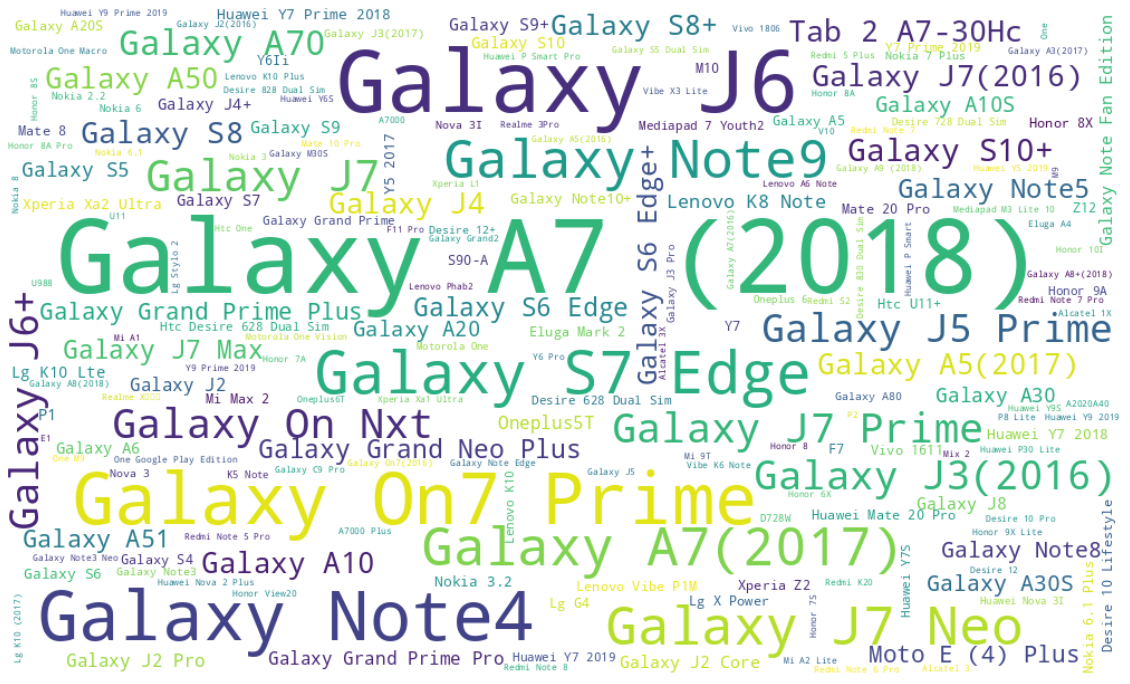

In [35]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Visualization:
I'll plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [36]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [37]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [38]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# shaded = hv.operation.datashader.datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * shaded

# plot = RSRP_data.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

import xarray as xr
import hvplot.pandas

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"], vdims=["RSRP"])
    # operator_points.opts(color="RSRP", size=hv.dim("RSRP").xr.absolute() * 50 )
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist", width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight

    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [39]:
points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [40]:
print(RSRP_data.shape)

(2725353, 10)


In [41]:
RSRP_data.drop_duplicates(inplace=True)

In [42]:
print(RSRP_data.shape)

(2723541, 10)


RSRP_data dataframe is now more ready for ML algorithms. I'll save the processed data for later use. The parquet format is used because it keeps the data types, faster during read/write operations and much smaller the csv files

In [43]:
#RSRP_data.to_parquet("./Data/RSRP_data_processed.parq")